## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [18]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree

In [20]:
iris = datasets.load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

clf = DecisionTreeClassifier(
                            criterion='entropy',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
)


clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [21]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [22]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.0156062  0.         0.62264163 0.36175217]


In [23]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


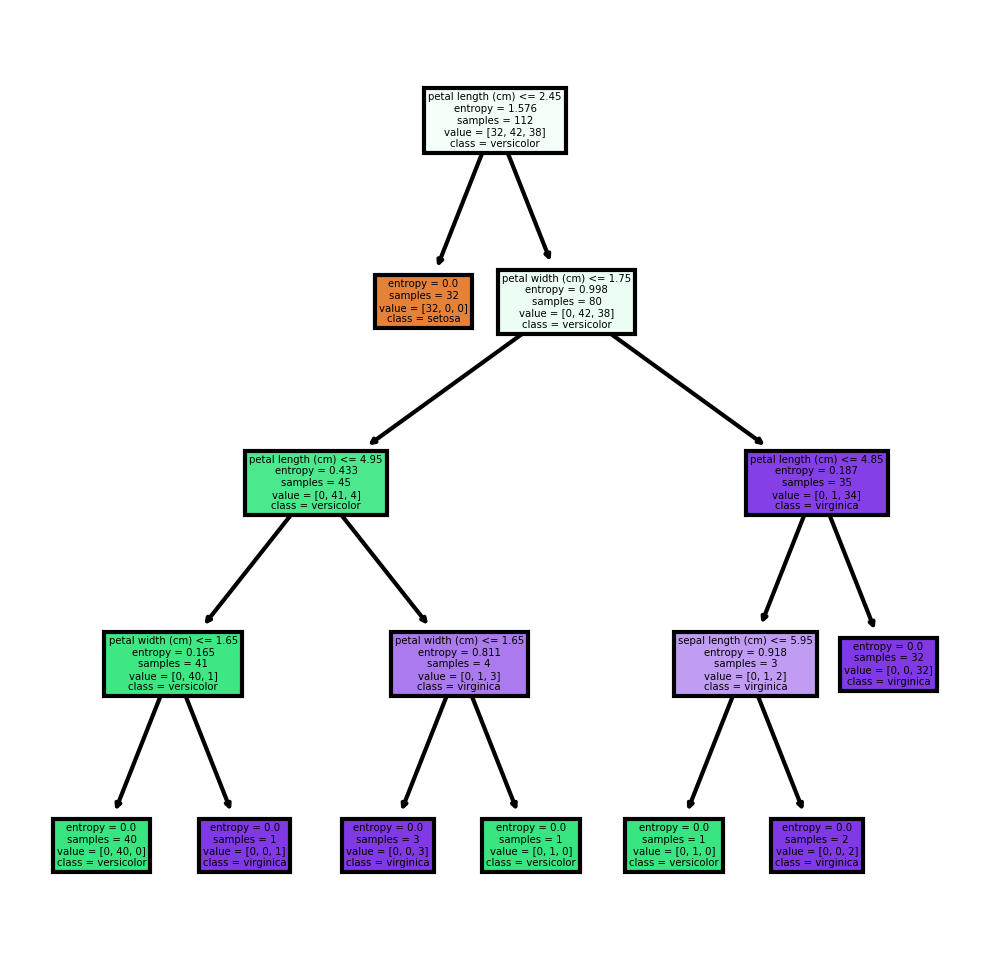

In [25]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [33]:
boston = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

clf = DecisionTreeRegressor()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [35]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 29.31


In [36]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.06788242 0.0021723  0.0126658  0.00955873 0.03008714 0.54413332
 0.01359231 0.05671297 0.00057059 0.01203362 0.02007566 0.00912242
 0.22139272]


In [37]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


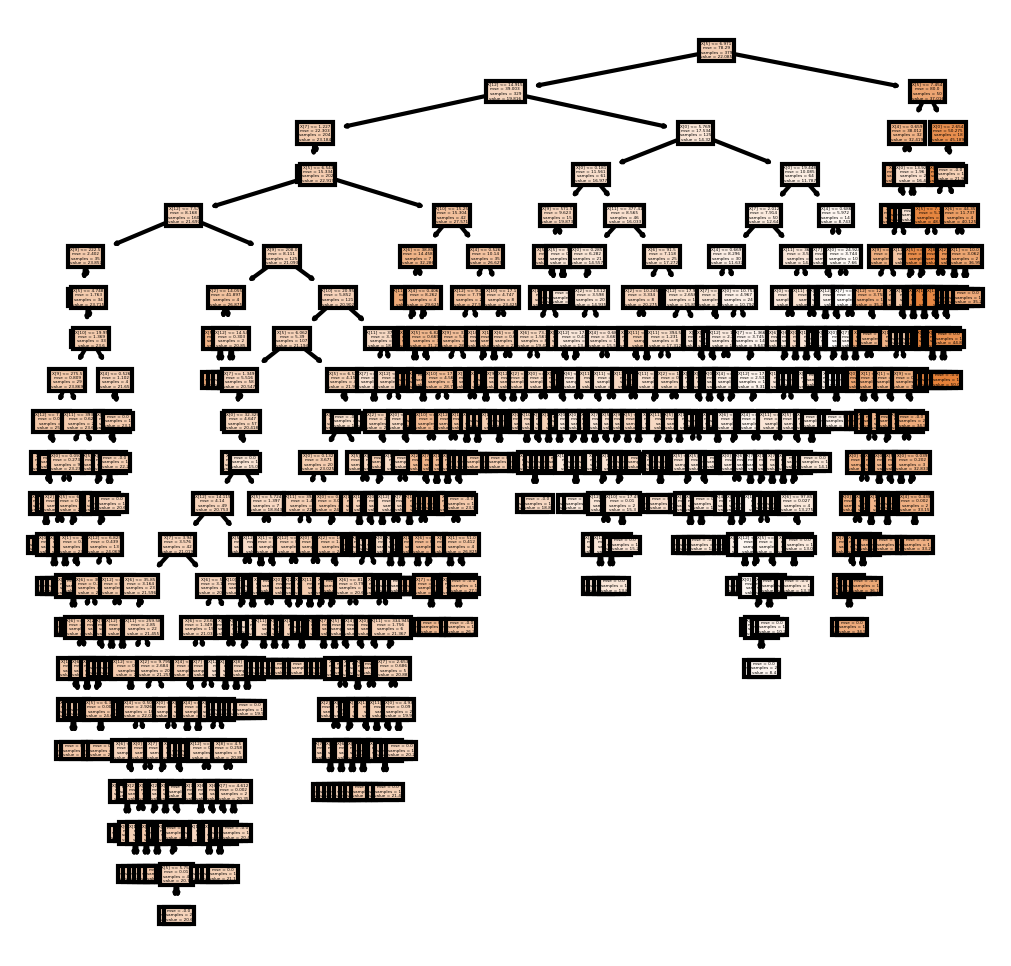

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
               filled = True);